## 2.4.4 Euler’s Method for Systems of Differential Equations

In the next example, we will illustrate Euler’s method for first and second order ODEs. We first recall the basic idea for first order equations. Given an initial value problem of the form

$$
y' = f(x, y), \quad y(a) = c,
$$

we want to find the approximate value of the solution at \( x = b \) with \( b > a \). Recall from the definition of the derivative that

$$
y'(x) \approx \frac{y(x + h) - y(x)}{h},
$$

where \( h > 0 \) is given and small. This and the DE together give

$$
f(x, y(x)) \approx \frac{y(x+h) - y(x)}{h}.
$$

Now solve for \( y(x + h) \):

$$
y(x + h) \approx y(x) + h \cdot f(x, y(x)).
$$

If we call \( h \cdot f(x, y(x)) \) the “correction term” (for lack of anything better), call \( y(x) \) the “old value of \( y \)”, and call \( y(x+h) \) the “new value of \( y \)”, then this approximation can be re-expressed as

$$
y_{\text{new}} \approx y_{\text{old}} + h \cdot f(x, y_{\text{old}}).
$$

If we break the interval from \( a \) to \( b \) into \( n \) steps, so that \( h = \frac{b-a}{n} \), then we can record the information for this method in a table.

\begin{array}{c|c|c}
x & y & h \cdot f(x, y) \\
\hline
a & c & h \cdot f(a, c) \\
a+h & c + h \cdot f(a, c) & \cdots \\
a+2h & \cdots & \\
\cdots & \cdots & \\
b = a + nh & ??? & \cdots 
\end{array}


The goal is to fill out all the blanks of the table, one row at a time, until we reach the ??? entry, which is the Euler’s method approximation for \( y(b) \).

The idea for systems of ODEs is similar.



# Numerical Approximation via Euler's Method

In this example, we will numerically approximate \( z(1) \) using 4 steps of Euler's method. Consider the differential equation:

$$z'' + t z' + z = 0$$

with initial conditions $z(0) = 1$ , $z'(0) = 0$ \).

## Reducing the Second Order ODE

To apply Euler's method, we first reduce the second order ODE to a system of first order ODEs. Let \( x = z \) and \( y = z' \), leading to:

\begin{align*}
x' &= y \\
y' &= -x - ty
\end{align*}

## Code Implementation



In [9]:
t, x, y = PolynomialRing(RealField(10), 3, "txy").gens()
f = y
g = -x - y * t

eulers_method_2x2(f, g, 0, 1, 0, 1/4, 1)

         t                    x                h*f(t,x,y)                    y           h*g(t,x,y)
         0                    1                      0.00                    0                -0.25
       1/4                  1.0                    -0.062                -0.25                -0.23
       1/2                 0.94                     -0.12                -0.48                -0.17
       3/4                 0.82                     -0.16                -0.66               -0.081
         1                 0.65                     -0.18                -0.74                0.022


The table output indicates  $z(1) \approx 0.65$.

## Plotting the Approximation

We can visualize this approximation by plotting the points \($x, y$\).


In [10]:
f = lambda z: z[2] # f(t, x, y) = y
g = lambda z: -sin(z[1]) # g(t, x, y) = -sin(x)

P = eulers_method_2x2_plot(f, g, 0.0, 0.75, 0.0, 0.1, 1.0)


At this point, \( P \) stores two plots: \( P[0] \), the plot of \( x \) vs. \( t \), and \( P[1] \), the plot of \( y \) vs. \( t \).

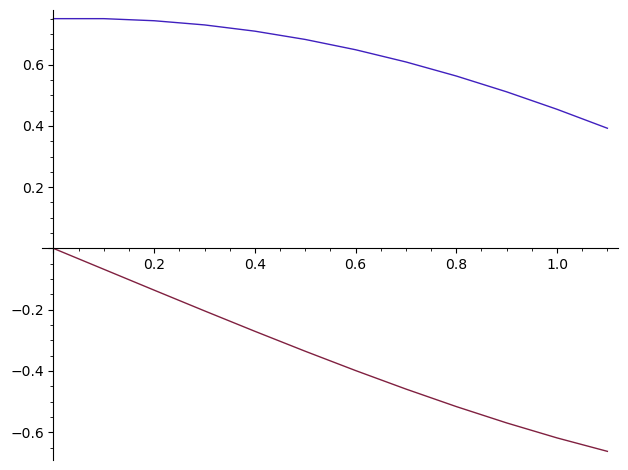

In [11]:
show(P[0] + P[1])


This visual representation helps in understanding the dynamics of the system for the given interval.

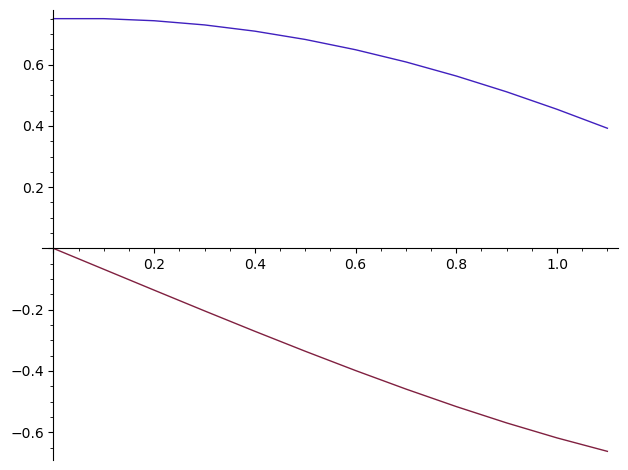

In [12]:
from sage.all import *
show(P[Integer(0)] + P[Integer(1)])

\(For more on plotting, see [Plotting](https://doc.sagemath.org/pdf/en/tutorial/sage_tutorial.pdf).\)
